#Workshop 4

*   Mateo Cano Solís - 1037660293
*   Keyla García Jaimes - 1026159841

In [ ]:
#Importar la data 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'deep_learning/CNN/'
print("base_dir is: ", base_dir)

Mounted at /content/drive
base_dir is:  /content/drive/My Drive/deep_learning/CNN/


In [ ]:
# baseline model for the dogs vs cats dataset
import os
import sys
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

##1.	Cambie el parámetro lr por learning_rate en todo el notebook para evitar los molestos warnings.
##2. Corra la red con three VGG blocks pero esta vez incluya ADAM.

In [ ]:
#Punto 1
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
 #Punto 2
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
print('> train dogs:',len(os.listdir(os.path.join(base_dir, 'dataset_dogs_vs_cats/train/dogs/'))))
print('> test cats:',len(os.listdir(os.path.join(base_dir, 'dataset_dogs_vs_cats/test/cats/'))))

> train dogs: 4000
> test cats: 1029


In [ ]:
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)


In [ ]:
# prepare iterators
train_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/train/'),
class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/test/'),
class_mode='binary', batch_size=64, target_size=(200, 200))

Found 8020 images belonging to 2 classes.
Found 2029 images belonging to 2 classes.


In [ ]:
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)

In [ ]:
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 74.569


VGG 3: 74.569% 

In [ ]:
from matplotlib import pyplot
import sys

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(os.path.join(base_dir, filename + '_plot3VGGBlock.png'))
	pyplot.close()

summarize_diagnostics(history)

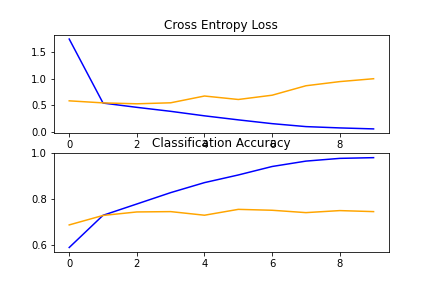

#3. ¿Qué hace el parámetro kernel_initializer='he_uniform'?.
##Rta: 
Los inicializadores definen la forma de establecer los pesos aleatorios iniciales de las capas de Keras.
El inicializador 'he_uniform' es un inicializador de escalado de varianza uniforme, es decir, se generarán números a partir de esa distribución estadística y se utilizarán como pesos iniciales.


#4. Pruebe el modelo con data augmentation pero sin dropout.

In [ ]:
from keras.callbacks import learning_rate_schedule
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
import os

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(os.path.join(base_dir, filename + '_plot3VGGBlock_PlusDAG.png'))
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/train/'),
	class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/test/'),
	class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 8000 images belonging to 2 classes.
Found 2029 images belonging to 2 classes.
> 68.507


Data aumentation = 68.507

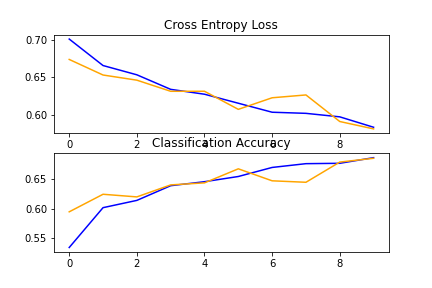


#5. Pruebe los otros parámetros de data augmentation sugeridos en el notebook.

## Dropout Regularization

In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(os.path.join(base_dir, filename + '_plot3VGGBlock_PlusDP_29.png'))
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/train/'),
	class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/test/'),
	class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 8000 images belonging to 2 classes.
Found 2029 images belonging to 2 classes.
> 58.699


Dropout = 58.699

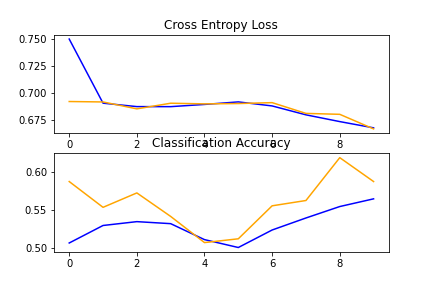

#6. Cree el modelo pero en vez de usar VGG16 use ResNet34

## Transfer Learning

In [ ]:
import sys
import os
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(os.path.join(base_dir, filename + '_plot16VGGBlock_TL_30.png'))
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/train/'),
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(os.path.join(base_dir, 'dataset_dogs_vs_cats/test/'),
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save(os.path.join(base_dir,'final_model.h5'))
	print(model.summary())
	#myfile = os.path.join(base_dir, 'model_plot.png')
	#plot_model(model, to_file=myfile, show_shapes=True, show_layer_names=True)
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()


Found 8000 images belonging to 2 classes.
Found 2029 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 69s 528ms/step - loss: 0.3487 - accuracy: 0.9572 - val_loss: 0.0734 - val_accuracy: 0.9734
Epoch 2/10
125/125 [==============================] - 65s 522ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0806 - val_accuracy: 0.9754
Epoch 3/10
125/125 [==============================] - 63s 500ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0917 - val_accuracy: 0.9754
Epoch 4/10
125/125 [==============================] - 63s 506ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9739
Epoch 5/10
125/125 [==============================] - 62s 498ms/step - loss: 7.6142e-04 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9749
Epoch 6/10
125/125 [==============================] - 63s 500ms/step - loss: 5.1575e-04 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9749
Epoch 7/10
125/125 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


> 97.437
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)  

Transfer Learning = 97.437

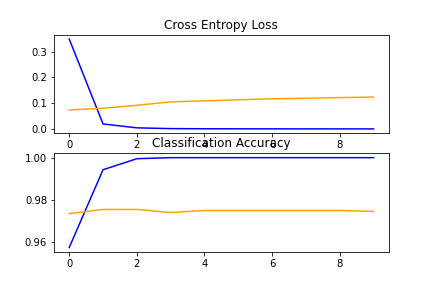

#7. Descargue una image de perro de internet y pruebe la predicción del modelo

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image(os.path.join(base_dir,'mora.jpg'))
	# load model
	model = load_model(os.path.join(base_dir,'final_model.h5'))
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[1.]


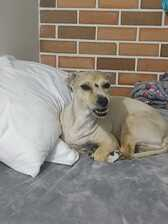

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image(os.path.join(base_dir,'gatitio.png'))
	# load model
	model = load_model(os.path.join(base_dir,'final_model.h5'))
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[6.9396185e-07]


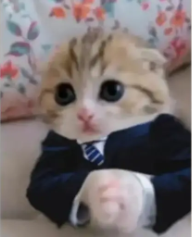

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image(os.path.join(base_dir,'muneco.jpeg'))
	# load model
	model = load_model(os.path.join(base_dir,'final_model.h5'))
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[0.99998]


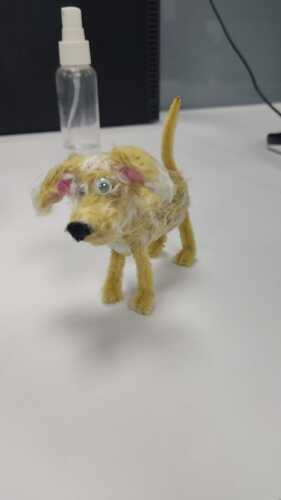

#Conclusiones

* Para la arquitectura de VGG-3 con el optimizador Adam, se obtuvo un accuracy de 74.6%, es decir, de 10 casos, 3 no serán correctamente clasificados. A partir de la segunda epoca se comienza a evidenciar un overfitting por lo que es necesario implementar estrategias de data aumentation o de dropout.
*En el modelo de Data augmentation sin dropout, el accuracy fue del 68.5%, sin embargo se obtuvieron resultados más positivos debido a que no existe overfitting, sin embargo, para mejorar el accuracy se sugiere aumentar las épocas, que para el caso de estudio fueron 10.
* Al realizar el ejercicio de Data augmentation con Dropout se esperaria que el overfitting disminuya, sin embargo, en este caso no se presenta. Con base en la gráfica de perdidas se podría concluir que el modelo no presenta overfitting, sin embargo, al evaluar la gráfica de accuracy se evidencia un overfitting para las primeras y últimas épocas. Adicionalmente, la gráfica de pérdida no presenta un comportamiento descendente, lo que explica los bajos valores de accuracy. 
*El uso de redes residuales permite obtener un accuracy de más del 97%, el cual se alcanza entre la segunda y la tercer época, lo que muestra que para este problema en particular este es el modelo más indicado. A nivel gráfico se podría concluir que existe un overfitting, sin embargo, las diferencia en la gráfica del accuracy son inferiores al 2%, por lo que confirma que el modelo es el más adecuado. 
